先安装必要的库
conda install scikit-learn

In [1]:
# 准备软件包
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
from planar_utils import *
import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline

In [2]:
# 定义超参数
EPOCHS = 2000
ALPHA = 0.5

X的维度: (2, 400)
Y的维度: (1, 400)
样本个数: 400


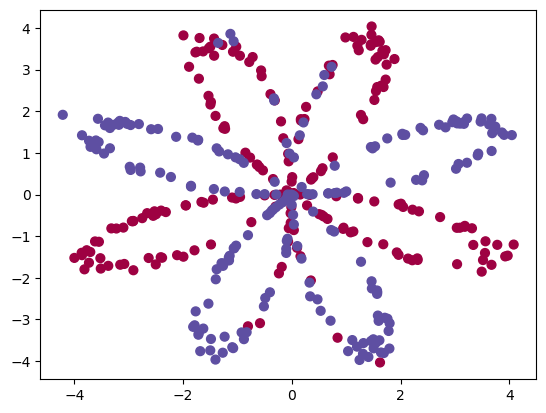

In [3]:
# 准备数据集
X, Y = load_planar_dataset()
print("X的维度:",X.shape)   # 2*400   记录数据点位置
print("Y的维度:",Y.shape)   # 1*400   标记数据点类型：红色0，蓝色1
m = Y.shape[1]   # 400记录样本个数
print("样本个数:",m)
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral) #绘制散点图

In [4]:
# 定义神经网络结构
def layer_size(X,Y):
    n_x = X.shape[0]    # 输入层结点数 此处是横纵坐标 取2
    n_h = 4           # 隐含层结点数 规定为4
    n_y = Y.shape[0]    # 输出层结点数 此处是标签0|1 取1
    return n_x,n_h,n_y

In [5]:
# 初始化参数
def init_params(n_x,n_h,n_y):
    W1=np.random.randn(n_h,n_x)*0.01   # 生成4*2的矩阵，矩阵元素服从N(0,1)
    b1=np.zeros((n_h,1))               # 生成4*1的矩阵，矩阵元素为0
    W2=np.random.randn(n_y,n_h)
    b2=np.zeros((n_y,1))
    params = { "W1" : W1,
               "W2" : W2,
               "b1" : b1,
               "b2" : b2 }
    return params

In [6]:
# 前向传播
def forward_backword(X, Y, W1, W2, b1, b2):
    # 前向传播
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    # 计算损失
    J = -1/m * np.sum(Y * np.log(A2) + (1-Y) * np.log(1-A2))
    
    # 反向传播
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    W1 = W1 - ALPHA*dW1
    W2 = W2 - ALPHA*dW2
    b1 = b1 - ALPHA*db1
    b2 = b2 - ALPHA*db2

    return W1, W2, b1, b2,J

In [7]:
# 模型整合
def nn_model(X,Y):
    n_x = layer_size(X,Y)[0]
    n_h = layer_size(X,Y)[1]
    n_y = layer_size(X,Y)[2]
    params = init_params(n_x,n_h,n_y)
    W1 = params["W1"]
    W2 = params["W2"]
    b1 = params["b1"]
    b2 = params["b2"]
    costs = []
    for i in range (EPOCHS):
        W1, W2, b1, b2, J = forward_backword(X, Y, W1, W2, b1 ,b2)
        if i%100 == 0:
            costs.append(J)
            print("迭代次数为：",i,"损失是：",J)
    parameters = {
        'W1':W1,
        'W2':W2,
        'b1':b1,
        'b2':b2
    }
    return costs,parameters

In [8]:
# 预测
def predict(parameters,X):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    # 前向传播
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    prediction = np.round(A2)
    return prediction

迭代次数为： 0 损失是： 0.6899403774228676
迭代次数为： 100 损失是： 0.4199185286677776
迭代次数为： 200 损失是： 0.3532802913392413
迭代次数为： 300 损失是： 0.33285867722751533
迭代次数为： 400 损失是： 0.32211216937712933
迭代次数为： 500 损失是： 0.31508408503178603
迭代次数为： 600 损失是： 0.3099533236154211
迭代次数为： 700 损失是： 0.30596361413800177
迭代次数为： 800 损失是： 0.30273190958991114
迭代次数为： 900 损失是： 0.30003451637559087
迭代次数为： 1000 损失是： 0.2977288540003204
迭代次数为： 1100 损失是： 0.2957194073075295
迭代次数为： 1200 损失是： 0.29393999171858
迭代次数为： 1300 损失是： 0.2923434377588295
迭代次数为： 1400 损失是： 0.2908952719563324
迭代次数为： 1500 损失是： 0.2895697216265076
迭代次数为： 1600 损失是： 0.28834711985137346
迭代次数为： 1700 损失是： 0.2872121773652661
迭代次数为： 1800 损失是： 0.28615280515833263
迭代次数为： 1900 损失是： 0.2851592954912455
准确率: 89%


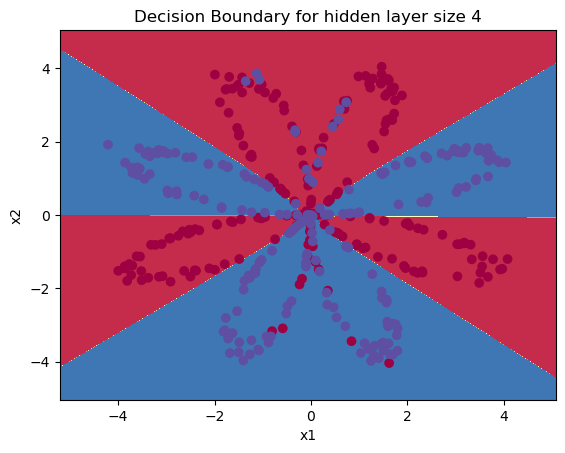

In [9]:
# 调用
costs,p = nn_model(X, Y)

#绘制边界
plot_decision_boundary(lambda x: predict(p, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

predictions = predict(p, X)
print ('准确率: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Text(0, 0.5, 'cost')

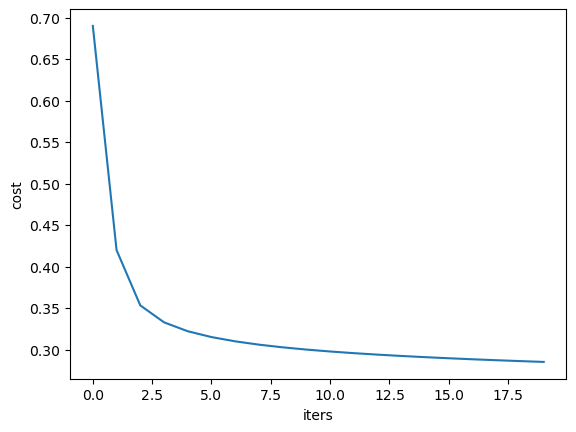

In [10]:
plt.plot(costs)
plt.xlabel("iters")
plt.ylabel("cost")